Este conjunto de dados nos dá dados de vendas de eletrônicos na Amazon. Contém classificações de usuários para vários itens eletrônicos vendidos, juntamente com categoria de cada item e tempo de venda.<br>
Originalmente este conjunto de dados foi usado em um concurso de ciência de dados pela Capgemini. O conceito principal era construir um sistema de recomendação de produtos.<br>
O meu trabalho em cima desse conjunto de dados vai ser identificar qual foi a categoria mais vendida, qual o ano em que mais vendas teve, mostrar as top 5 categorias em vendas e mostrar em um gráfico<br>
Fonte do conjunto de dados: https://www.kaggle.com/datasets/edusanketdk/electronics 

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importando o conjunto de dados
ds = pd.read_csv('electronics.csv')

In [3]:
# Abrindo os 10 primeiros registros
ds.head(10)

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
5,0,5,2.0,1999-07-12,Female,Portable Audio & Video,NaN,1999,NaN,0
6,0,6,5.0,1999-07-13,Female,Portable Audio & Video,NaN,1999,NaN,0
7,0,7,2.0,1999-07-13,Female,Portable Audio & Video,NaN,1999,NaN,0
8,0,8,4.0,1999-07-16,Female,Portable Audio & Video,NaN,1999,NaN,0
9,0,9,5.0,1999-08-20,Female,Portable Audio & Video,NaN,1999,NaN,0


In [4]:
# Informações básicas do dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [5]:
# Verificando se há algum dado nulo, ausente
ds.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand          961834
year                0
user_attr     1118830
split               0
dtype: int64

Como para o caso em questão o brand e user_attr não são importantes, vamos deletar do dataset

In [6]:
df = ds.drop(['brand', 'user_attr'], axis=1)
df

,item_id,user_id,rating,timestamp,model_attr,category,year,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,1999,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,1999,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,1999,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,1999,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,1999,0
...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,2017,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,2017,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,2016,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,2018,0


In [7]:
# Breve descrição do novo conjunto de dados
df.describe()

,item_id,user_id,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.183588e+03,5.605127e+05,4.051482e+00,2.012938e+03,1.747587e-01
std,2.525346e+03,3.342374e+05,1.379732e+00,2.643513e+00,5.506810e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.999000e+03,0.000000e+00
25%,2.018000e+03,2.697482e+05,4.000000e+00,2.012000e+03,0.000000e+00
50%,3.930000e+03,5.518920e+05,5.000000e+00,2.014000e+03,0.000000e+00
75%,6.289000e+03,8.474858e+05,5.000000e+00,2.015000e+03,0.000000e+00
max,9.559000e+03,1.157632e+06,5.000000e+00,2.018000e+03,2.000000e+00


# <center>PERGUNTAS DE NEGÓCIO</center>

### 1. Qual categoria foi a mais vendida?

In [8]:
categoria_mais_vendida = df['category'].mode()
categoria_mais_vendida

0    Headphones
dtype: object

A categoria que mais vendeu produtos foi Headphones

### 2. Qual o ano em que a categoria Headphones mais vendeu?

In [9]:
# Primeiro vamos aplicar uma máscara à coluna category e selecionar somente a característica Headphones
df_mask = df['category'] == 'Headphones'
df_filtro = df[df_mask]
df_filtro

,item_id,user_id,rating,timestamp,model_attr,category,year,split
16,2,16,4.0,1999-10-25,Female&Male,Headphones,2000,0
34,2,34,5.0,1999-12-05,Female&Male,Headphones,2000,0
83,2,83,5.0,2000-04-05,Female&Male,Headphones,2000,0
103,2,103,5.0,2000-05-14,Female&Male,Headphones,2000,0
136,2,136,4.0,2000-06-24,Female&Male,Headphones,2000,0
...,...,...,...,...,...,...,...,...
1292933,9315,1157613,5.0,2018-09-20,Male,Headphones,2016,0
1292948,9217,1157627,5.0,2018-09-25,Male,Headphones,2016,0
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,2017,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,2018,0


In [10]:
# Agora podemos aplicar o método mode para verificar qual foi o ano em que Headphones foi mais vendido
df_filtro['year'].mode()

0    2015
dtype: int64

O ano de 2015 foi o que mais teve vendas de Headphones

### 3. Quais as 5 categorias mais vendidas

In [11]:
# Primeiro vamos identificar quanto foi vendido de cada categoria
df['category'].value_counts()

Headphones                 359334
Computers & Accessories    322938
Camera & Photo             192573
Accessories & Supplies     158598
Portable Audio & Video     143370
Car Electronics & GPS       33070
Television & Video          32057
Home Audio                  24193
Wearable Technology         16015
Security & Surveillance     10806
Name: category, dtype: int64

In [12]:
# Agora vamos ordenar os top 5 em ordem decrescente
top_5 = df['category'].value_counts(ascending=False).head()
top_5

Headphones                 359334
Computers & Accessories    322938
Camera & Photo             192573
Accessories & Supplies     158598
Portable Audio & Video     143370
Name: category, dtype: int64

As 5 categorias que mais venderam, em ordem de vendas, foram: Headphones, Computers & Accessories, Camera & Photo, Accessories & Supplies e Portable Audio & Video

### 4. Construindo o gráfico com os top 5

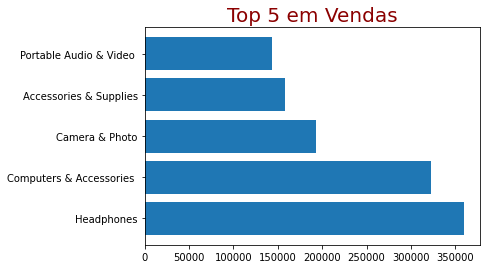

In [13]:
plt.plot()
x = ['Headphones', 'Computers & Accessories ', 'Camera & Photo', 'Accessories & Supplies', 'Portable Audio & Video ']
y = top_5
plt.title('Top 5 em Vendas', color='darkred', size=20)
plt.barh(x, y)
plt.show()